In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import gensim
from gensim.models import Word2Vec
import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.parsing.preprocessing import strip_punctuation
print((gensim.__version__))  # needed 3.8.3   -> pip install gensim==3.8.3
from sklearn.linear_model import LogisticRegression
import functions
import re

4.1.2


## Upload sources - trained models, data

In [3]:
train_year = 2020
test_year = 2020

In [ ]:
df_all = pd.read_csv("1.Preprocessing_outputs/df_sw_tok_low_punc_lemm_v6.csv").rename(columns = {'doi_x':'doi'})
df_with_target = functions.add_target_opencitatins_marginal(target_year = train_year,df = df_all,target_col_name="target")

# Upload models

In [7]:
lreg_w2v_avg = pickle.load(open('3.Classifiers_outputs/train_'+str(train_year)+'/'+'lreg_w2v_avg_'+str(train_year)+'.sav', 'rb'))
model_w2v = gensim.models.Word2Vec.load("2.Train_embeddings_outpus/w2v_published_between_"+str(train_year-1) + " and "+ str(train_year)+".model")

lreg_bow =  pickle.load(open('3.Classifiers_outputs/train_'+str(train_year)+'/'+'lreg_bow_'+str(train_year)+'.sav', 'rb'))
with open('3.Classifiers_outputs/train_'+str(train_year)+'/'+'tokens_bow_'+str(train_year)+'.data', 'rb') as filehandle:
    tokens_bow = pickle.load(filehandle)

## FI BOW

In [8]:
feature_importance = functions.importance_lr_bow(tokens_bow,lreg_bow,n=100)
feature_importance

,word,score
3761,general,1.648725
9585,zikv,1.447194
2635,discovery,1.438781
3229,evolutionary,1.377196
6074,nucleic,1.373583
...,...,...
8783,three,0.750123
3392,facilitate,0.711763
7255,rare,0.710761
2732,domestic,0.678666


In [9]:
functions.importance_lr_bow(tokens_bow,lreg_bow,n=0).to_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+'FI_LR_BOW.csv')

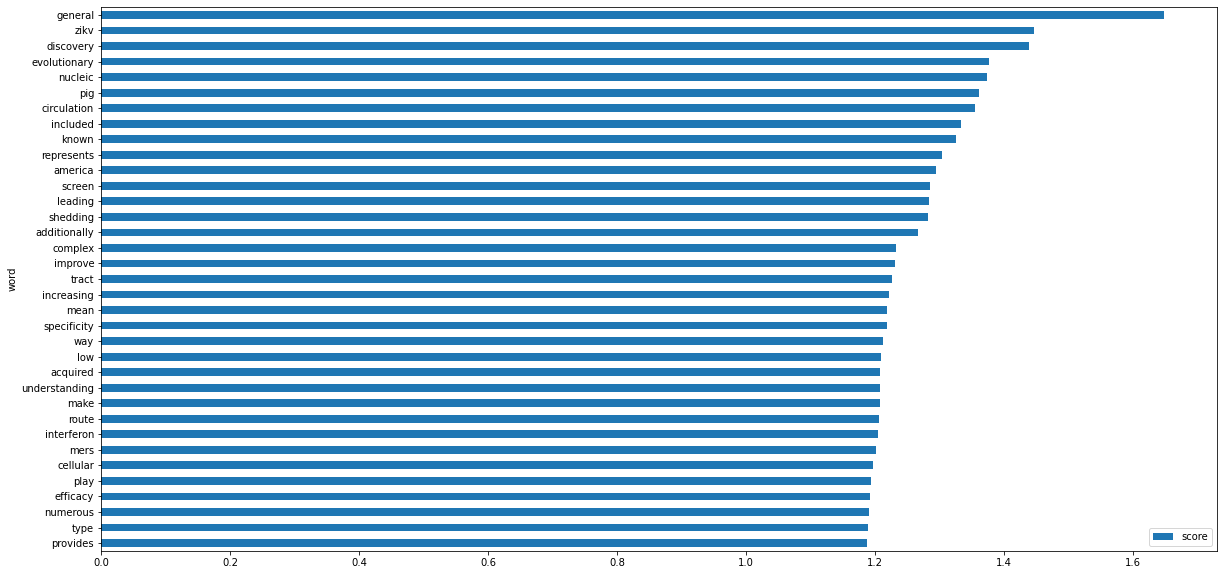

In [10]:
ax = feature_importance[:35].plot.barh(x='word', y='score',figsize=(20,10))
ax.invert_yaxis()

In [11]:
words_lr_bow = functions.word_score_info(list(feature_importance.word.values), feature_importance, df_with_target,df_all,add_dois = True)

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]C:\Users\berl03\Desktop\IGA - PRECOG\kody\functions.py:448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results_f['cnt_of_articles_with_targ'] = (df_with_target["is_in_article"].fillna(0).astype(int).sum())
C:\Users\berl03\Desktop\IGA - PRECOG\kody\functions.py:449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results_f['%_of_high_cit'] = (df_with_target[df_with_target["targe

In [27]:
words_lr_bow 

,word,score,cnt_of_articles_with_targ,%_of_high_cit,cnt_of_articles,first_year,articles_low,articles_high
0,general,1.648725,947,0.458289,44722,1973.0,10.1186/1745-7580-1-2****10.1186/1471-2458-6-2...,10.1371/journal.pone.0001831****10.1371/journa...
1,zikv,1.447194,56,0.821429,439,2016.0,10.7717/peerj.3015****10.1371/journal.pntd.000...,10.3389/fnhum.2016.00403****10.1371/journal.pp...
2,discovery,1.438781,492,0.569106,6840,1972.0,10.1093/nar/gkn794****10.2217/fmb.09.15****10....,10.1371/journal.pone.0000645****10.1093/ecam/n...
3,evolutionary,1.377196,311,0.604502,3490,1986.0,10.1371/journal.pone.0000679****10.1371/journa...,10.1371/journal.ppat.1000418****10.1371/journa...
4,nucleic,1.373583,413,0.535109,5240,1973.0,10.1186/1472-6750-6-3****10.1016/j.ymeth.2005....,10.1093/nar/gki789****10.1093/nar/gkp278****10...
...,...,...,...,...,...,...,...,...
195,three,0.750123,1676,0.394391,58619,1969.0,10.1186/1744-8603-1-1****10.1186/1471-2458-6-9...,10.1093/nar/gkl679****10.1371/journal.pntd.000...
196,facilitate,0.711763,542,0.472325,15012,1977.0,10.1093/nar/gni053****10.1186/1745-7580-1-2***...,10.1007/s00418-007-0359-6****10.1371/journal.p...
197,rare,0.710761,387,0.390181,13933,1970.0,10.1093/nar/gkp779****10.1186/1752-1947-3-138*...,10.1371/journal.pone.0002768****10.1371/journa...
198,domestic,0.678666,269,0.390335,5038,1975.0,10.1155/2011/284795****10.1093/aje/kwr411****1...,10.1371/journal.pbio.1000053****10.1111/j.1750...


In [12]:
words_lr_bow.to_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+'FI_LR_BOW_200_with_info.csv')

### Correlation between "%_of_articles_with_high" and importance of word

Tahle analýza dokazuje, že když chci detekovat to, podle jakým slov model rozhoduje, hraje roli frekvenční analýza jednotlivých slov. Čím více dané slovo se vyskytuje v jedné třídě, tím model podle ní více zařazoval. 
K čemu to vede? Můžu validovat feature importance v novém roce..?

,%_of_high_cit,score
%_of_high_cit,1.000000,0.517758
score,0.517758,1.000000


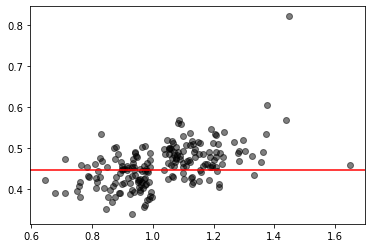

In [13]:
significant_point = len(df_with_target[df_with_target["target"]==1])/len(df_with_target)

%matplotlib inline
x = words_lr_bow["score"]
y = words_lr_bow["%_of_high_cit"]
plt.scatter(x, y, color = 'k', alpha=0.5)
plt.axhline(y=significant_point, color='r', linestyle='-')

words_lr_bow[["%_of_high_cit","score"]].astype(float).corr()

In [14]:
words_lr_bow[words_lr_bow["cnt_of_articles_with_targ"]>5][["%_of_high_cit","score"]].astype(float).corr()

,%_of_high_cit,score
%_of_high_cit,1.000000,0.517758
score,0.517758,1.000000


In [15]:
words_lr_bow[words_lr_bow["cnt_of_articles_with_targ"]>10][["%_of_high_cit","score"]].astype(float).corr()

,%_of_high_cit,score
%_of_high_cit,1.000000,0.517758
score,0.517758,1.000000


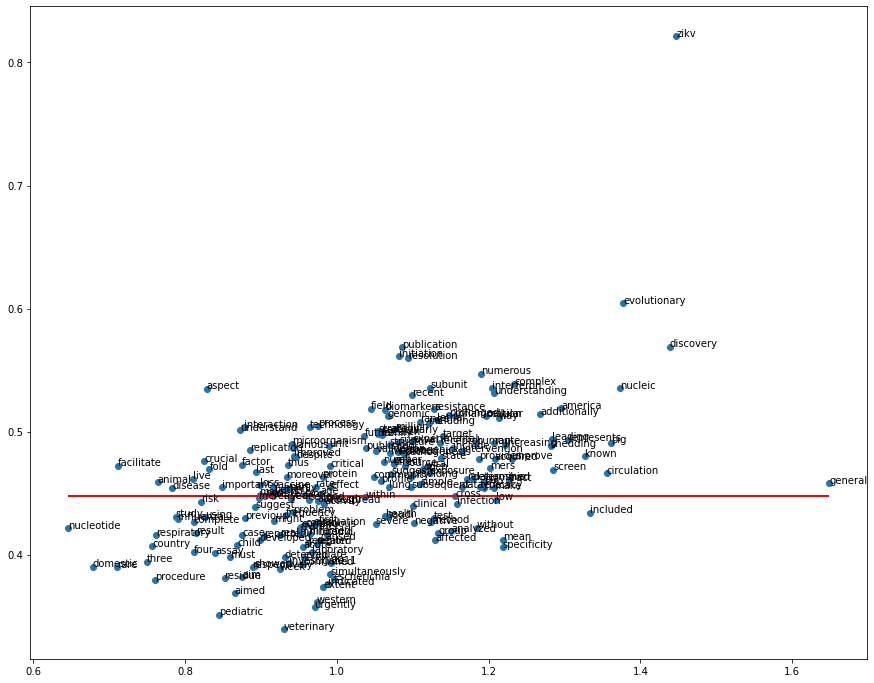

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
x = words_lr_bow["score"]
y = words_lr_bow["%_of_high_cit"]
n=list(words_lr_bow["word"].astype(str).values)
ax.scatter(x, y)
ax.hlines(y=significant_point, xmin=min(words_lr_bow["score"]), xmax=max(words_lr_bow["score"]), linewidth=2, color='r')
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.show()

# Importance of lreg w2v

In [17]:
#### words from articles for which have information about target (citations)
df_with_target['abstract_tokenized'] = functions.tokenized_column(df_with_target.reset_index()["abstract_cleaned"])
words_list_with_target = list(set([a for b in df_with_target.reset_index()['abstract_tokenized'] for a in b]))
print(len(words_list_with_target))

#### words of word2vec model dictionary trained on whole kaggle corpus
words = model_w2v.wv.key_to_index.keys()
we_dict = {word:model_w2v.wv[word] for word in words}
words_list_total = pd.DataFrame(we_dict.items())
print(len(words_list_total))

39894
32894


In [18]:
n=100
score_of_word_lr_avg_2 =  functions.score_of_word(model_w2v,lreg_w2v_avg).sort_values(by = ["score"], ascending=False).iloc[[*range(n),*range(-n,0)]]

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]C:\Users\berl03\Desktop\IGA - PRECOG\kody\functions.py:448: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results_f['cnt_of_articles_with_targ'] = (df_with_target["is_in_article"].fillna(0).astype(int).sum())
C:\Users\berl03\Desktop\IGA - PRECOG\kody\functions.py:449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results_f['%_of_high_cit'] = (df_with_target[df_with_target["targe

In [29]:
words_lr_w2v_avg_2

,word,score,cnt_of_articles_with_targ,%_of_high_cit,cnt_of_articles,first_year,articles_low,articles_high
0,ubiquitination,0.685378,66,0.560606,399,2005.0,10.1371/journal.pone.0000679****10.1371/journa...,10.1371/journal.pone.0080976****10.1038/srep36...
1,ifns,0.677961,80,0.575,569,1986.0,10.1093/nar/gkp714****10.3390/v4010102****10.4...,10.1371/journal.pone.0025858****10.1371/journa...
2,isgylation,0.670022,7,0.857143,65,2008.0,10.1371/journal.ppat.1006372,10.1038/ncomms12754****10.1038/nsmb.3371****10...
3,effector,0.666575,207,0.618357,2061,1981.0,10.1371/journal.ppat.1000980****10.1371/journa...,10.1038/sj.emboj.7601746****10.1371/journal.pp...
4,inflammatory,0.655469,986,0.486815,24707,1972.0,10.1186/rr14****10.1093/schbul/sbm139****10.21...,10.1186/rr19****10.1186/rr44****10.1186/1465-9...
...,...,...,...,...,...,...,...,...
195,twenty-eight,0.178603,16,0.3125,538,1997.0,10.1371/journal.pone.0100388****10.1007/s00147...,10.3201/eid2206.151521****10.1007/s10067-009-1...
196,specimen,0.174907,555,0.394595,6981,1968.0,10.1371/journal.pone.0000489****10.1093/schbul...,10.3201/eid1403.071027****10.1371/journal.pone...
197,bal,0.174536,1426,0.467041,67442,1975.0,10.1093/emboj/19.17.4701****10.1186/1744-8603-...,10.1186/1472-6939-7-12****10.1371/journal.ppat...
198,record,0.164668,378,0.39418,27279,1979.0,10.1155/2009/591935****10.1371/journal.pone.00...,10.1093/rheumatology/keq277****10.1186/cc9324*...


In [19]:
words_lr_w2v_avg_2.to_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+'FI_LR_W2V_200_with_info.csv')

In [20]:
functions.score_of_word(model_w2v,lreg_w2v_avg).sort_values(by = ["score"], ascending=False).to_csv('3.Classifiers_outputs/train_'+str(train_year)+'/'+'FI_LR_W2V.csv')

# VALIDATE

### Correlation between "%_of_articles_with_high" and score of word

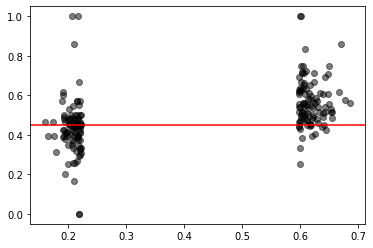

In [21]:
%matplotlib inline
x = words_lr_w2v_avg_2["score"]
y = words_lr_w2v_avg_2["%_of_high_cit"]
plt.scatter(x, y, color = 'k', alpha=0.5)
plt.axhline(y=significant_point, color='r', linestyle='-')

In [22]:
words_lr_w2v_avg_2[["%_of_high_cit","score"]].astype(float).corr()

,%_of_high_cit,score
%_of_high_cit,1.00000,0.44527
score,0.44527,1.00000


In [23]:
words_lr_w2v_avg_2[words_lr_w2v_avg_2["cnt_of_articles_with_targ"]>5][["%_of_high_cit","score"]].astype(float).corr()

,%_of_high_cit,score
%_of_high_cit,1.00000,0.54417
score,0.54417,1.00000


In [24]:
words_lr_w2v_avg_2[words_lr_w2v_avg_2["cnt_of_articles_with_targ"]>10][["%_of_high_cit","score"]].astype(float).corr()

,%_of_high_cit,score
%_of_high_cit,1.000000,0.595415
score,0.595415,1.000000


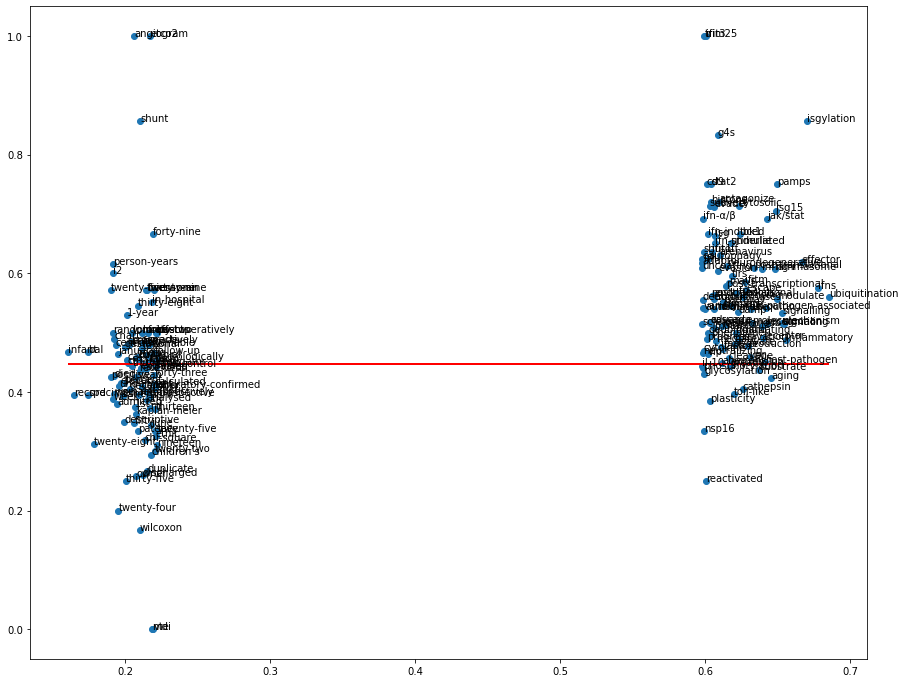

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
x = words_lr_w2v_avg_2["score"]
y = words_lr_w2v_avg_2["%_of_high_cit"]
n=list(words_lr_w2v_avg_2["word"].astype(str).values)
ax.scatter(x, y)
ax.hlines(y=significant_point, xmin=min(words_lr_w2v_avg_2["score"]), xmax=max(words_lr_w2v_avg_2["score"]), linewidth=2, color='r')
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.show()